# Credit Card Fraud Detection (신용카드 사기 탐지)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
%matplotlib inline
pd.options.display.max_rows = 20
sns.set(style='whitegrid', palette='pastel', font_scale=1, rc={'font.family':'NanumGothic'})

## 1. Import Dataset

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

null 값이 존재하는 feature는 없다.

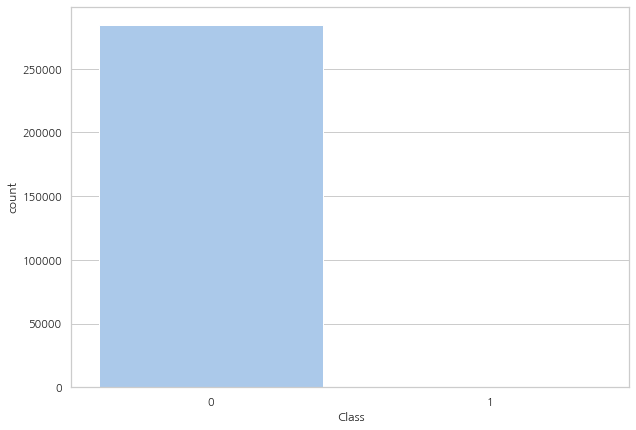

In [4]:
plt.figure(figsize=(10, 7))
sns.countplot(df['Class'])

1이 거의 안보일정도.. 클래스 불균형(Class Imbalance)이 심한 데이터이다.

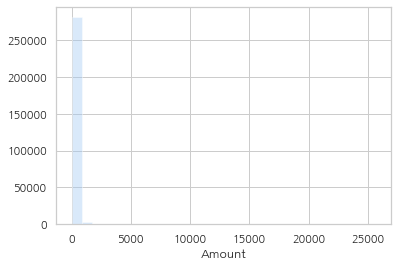

In [5]:
sns.distplot(df['Amount'], kde=False, bins=30)

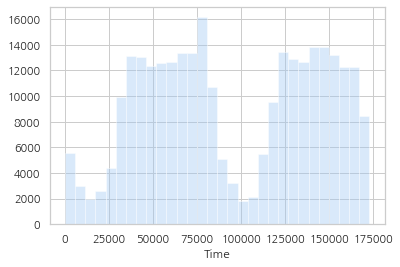

In [6]:
sns.distplot(df['Time'], kde=False, bins=30)

## 3. Model Training

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [8]:
# class 변수 제외한 나머지 values
X = df.iloc[:,:-1].values
print(X)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


In [9]:
# class 변수
y = df.iloc[:,-1].values
print(y)

[0 0 0 ... 0 0 0]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(227845, 30) (56962, 30)
(227845,) (56962,)


In [11]:
# 클래스 불균형 -> 오버샘플링
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print(X_train_over.shape, y_train_over.shape)

(454908, 30) (454908,)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_over)
X_test = sc.fit_transform(X_test)

#### DNN

In [13]:
from keras import models
from keras import layers

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
x_val = X_train_over[:10000]
partial_x_train = X_train_over[10000:]

y_val = y_train_over[:10000]
partial_y_train = y_train_over[10000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
869/869 [==============================] - 5s 4ms/step - loss: 38.3086 - accuracy: 0.6084 - val_loss: 0.1582 - val_accuracy: 0.9897
Epoch 2/20
869/869 [==============================] - 3s 4ms/step - loss: 18.9175 - accuracy: 0.7342 - val_loss: 0.1493 - val_accuracy: 0.9931
Epoch 3/20
869/869 [==============================] - 3s 4ms/step - loss: 10.4127 - accuracy: 0.7884 - val_loss: 6.2755 - val_accuracy: 0.3576
Epoch 4/20
869/869 [==============================] - 3s 4ms/step - loss: 7.4517 - accuracy: 0.8394 - val_loss: 0.1918 - val_accuracy: 0.9884
Epoch 5/20
869/869 [==============================] - 4s 4ms/step - loss: 9.9345 - accuracy: 0.8294 - val_loss: 0.5203 - val_accuracy: 0.9650
Epoch 6/20
869/869 [==============================] - 4s 5ms/step - loss: 8.8966 - accuracy: 0.8740 - val_loss: 0.3628 - val_accuracy: 0.9836
Epoch 7/20
869/869 [==============================] - 4s 5ms/step - loss: 6.7414 - accuracy: 0.8948 - val_loss: 0.2350 - val_accuracy: 0.9952
Epo

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

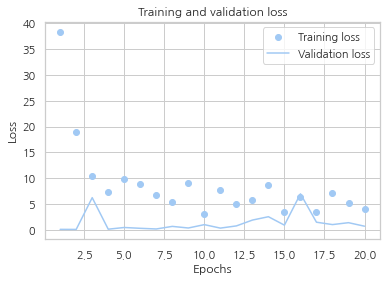

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

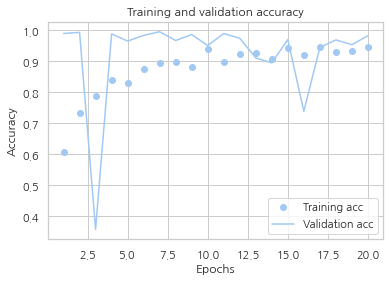

In [24]:
plt.clf() # 그래프 초기화
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

아주 이상한 그래프가 나왔다.  
모델 구조를 바꿔서 다시 학습시켜보자:)